# Predicting The Premier League

- In this project I will be using data from 2014-19 of the epl which will have data of every match played in the premeier league during this period. I have collected the data from https://sports-statistics.com/sports-data/ .

In [1]:
#importing the basic libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###  Importing the data files and cleaning it as per need
- I am going to use 5 csv files each conatining all the matches of a single season, so we have concatinated all 5 files in a single dataframe for easier data manipulation 

In [2]:
a = pd.read_csv('Data/epl_season-1819_csv.csv')
b = pd.read_csv('Data/epl_season-1718_csv.csv')
c = pd.read_csv('Data/epl_season-1617_csv.csv')
e = pd.read_csv('Data/epl_season-1516_csv.csv')
f = pd.read_csv('Data/epl_season-1415_csv.csv')
d = pd.concat([f,e,c,b,a])
df_epl = pd.DataFrame(d)
df_epl.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,1.532632,1.180526,0.678947,0.523158,14.133684,11.227895,4.714211,3.822105,10.547368,11.070000,5.820526,4.675263,1.565263,1.750526,0.056316,0.078947,2.953426,4.233642,5.103942
std,1.296282,1.161766,0.838187,0.741453,5.711976,4.727449,2.656756,2.241110,3.396304,3.508636,3.109025,2.660403,1.231265,1.276380,0.239552,0.275522,2.292338,1.429377,4.586530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,3.000000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.670000,3.400000,2.397500
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,4.000000,4.000000,10.000000,11.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.250000,3.700000,3.500000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,3.200000,4.500000,5.750000
max,8.000000,7.000000,5.000000,4.000000,43.000000,30.000000,17.000000,15.000000,24.000000,26.000000,19.000000,15.000000,7.000000,9.000000,2.000000,2.000000,23.000000,17.000000,41.000000


- We have to sort the dataframe with respect to the dates of the matches played

In [3]:
#sorting the data by date and deleting unwanted columns
df_epl['Date'] = pd.to_datetime(df_epl['Date'],format = '%d-%m-%Y')
df_epl.sort_values(by = 'Date',inplace = True) #sorting the dataset by date
df_epl.reset_index(drop=True,inplace = True)
df_epl.drop(['Div','B365H','B365D','B365A'],axis = 1,inplace = True) #dropping the div column as it is understood it is div1 and also the betting values
df_epl.head(20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,1,D,J Moss,...,6,2,13,19,9,3,2,2,0,1
1,2014-08-16,Leicester,Everton,2,2,D,1,2,A,M Jones,...,3,3,16,10,3,6,1,1,0,0
2,2014-08-16,Man United,Swansea,1,2,A,0,1,A,M Dean,...,5,4,14,20,4,0,2,4,0,0
3,2014-08-16,QPR,Hull,0,1,A,0,0,D,C Pawson,...,6,4,10,10,8,9,1,2,0,0
4,2014-08-16,Stoke,Aston Villa,0,1,A,0,0,D,A Taylor,...,2,2,14,9,2,8,0,3,0,0
5,2014-08-16,West Brom,Sunderland,2,2,D,1,1,D,N Swarbrick,...,5,2,18,9,6,3,3,1,0,0
6,2014-08-16,West Ham,Tottenham,0,1,A,0,0,D,C Foy,...,4,4,12,10,8,5,1,0,1,1
7,2014-08-17,Liverpool,Southampton,2,1,H,1,0,H,M Clattenburg,...,5,6,8,11,2,6,1,2,0,0
8,2014-08-17,Newcastle,Man City,0,2,A,0,1,A,M Atkinson,...,0,5,8,11,3,3,1,5,0,0
9,2014-08-18,Burnley,Chelsea,1,3,A,1,3,A,M Oliver,...,2,3,6,7,4,3,1,1,0,0


In [4]:
df_epl.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG                 int64
HTAG                 int64
HTR                 object
Referee             object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
dtype: object

- As there is no column which mentions the season in which the match is played, we have to specify the season for each match

In [5]:
#assigning the season to each game
df_epl.columns = ['Date','hometeam','awayteam','fulltime_home_goals','fulltime_away_goals','fulltime_results','halftime_home_goals','halftime_away_goals','halftime_results','refree','home_shot','away_shot','home_shot_ontarget','away_shot_ontarget','home_fouls','away_fouls','home_corner','away_corner','home_yellow','away_yellow','home_red','away_red']
df_epl['season'] = (df_epl.index // 380) + 1
df_epl.head()

,Date,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,halftime_away_goals,halftime_results,refree,...,away_shot_ontarget,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red,season
0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,1,D,J Moss,...,2,13,19,9,3,2,2,0,1,1
1,2014-08-16,Leicester,Everton,2,2,D,1,2,A,M Jones,...,3,16,10,3,6,1,1,0,0,1
2,2014-08-16,Man United,Swansea,1,2,A,0,1,A,M Dean,...,4,14,20,4,0,2,4,0,0,1
3,2014-08-16,QPR,Hull,0,1,A,0,0,D,C Pawson,...,4,10,10,8,9,1,2,0,0,1
4,2014-08-16,Stoke,Aston Villa,0,1,A,0,0,D,A Taylor,...,2,14,9,2,8,0,3,0,0,1


In [6]:
print('Total teams played in these 5 years: ',df_epl['awayteam'].nunique())
print('\nNames of those teams are:',df_epl['awayteam'].unique())

Total teams played in these 5 years:  29

Names of those teams are: ['Crystal Palace' 'Everton' 'Swansea' 'Hull' 'Aston Villa' 'Sunderland'
 'Tottenham' 'Southampton' 'Man City' 'Chelsea' 'Burnley' 'West Brom'
 'Arsenal' 'Leicester' 'Newcastle' 'West Ham' 'Stoke' 'Man United' 'QPR'
 'Liverpool' 'Watford' 'Norwich' 'Bournemouth' 'Middlesbrough'
 'Huddersfield' 'Brighton' 'Cardiff' 'Wolves' 'Fulham']


In [7]:
#counting total matches played by each team
number_of_games_epl = df_epl['hometeam'].value_counts() + df_epl['awayteam'].value_counts()
team_games_epl = pd.DataFrame(number_of_games_epl).sort_index(axis = 0) 
team_games_epl.columns = ['Total games']
team_games_epl

,Total games
Arsenal,190
Aston Villa,76
Bournemouth,152
Brighton,76
Burnley,152
Cardiff,38
Chelsea,190
Crystal Palace,190
Everton,190
Fulham,38


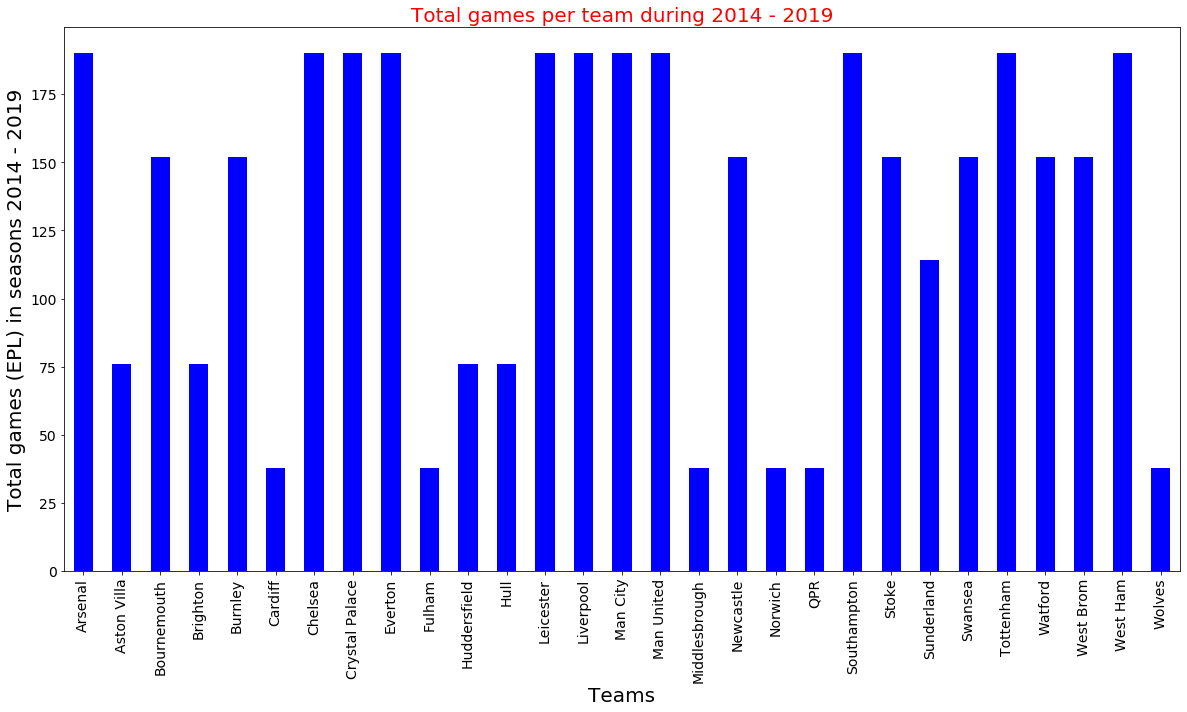

In [8]:
team_games_epl.plot(kind='bar',color='blue', legend=False, figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Total games (EPL) in seasons 2014 - 2019',fontsize=20)
plt.title('Total games per team during 2014 - 2019',fontsize=20, color='red')
plt.show()

### Results for home and away matches

- We have to see what percentage of matches have ended in a draw and how much is the home advantage in the epl

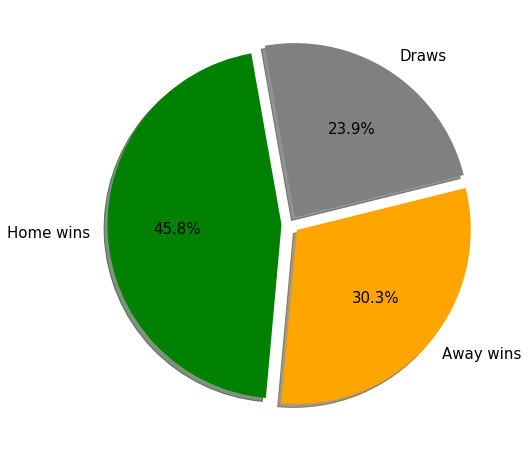

In [9]:
results = pd.DataFrame(df_epl['fulltime_results'].value_counts())
fig = plt.figure(figsize = (8,8))
plt.pie(results,autopct = '%1.1f%%',startangle = 100,labels = ['Home wins','Away wins','Draws'],shadow = True,explode = (0.05,0.05,0.05),colors = ('green','orange','grey'),textprops = {'fontsize':15})
plt.show()

### Points Table with some stats

- We will create a ponts table for the last 5 seasons and see which teams have performed better and worst, we will also which stats has helped the to do so or has troubled them.

In [10]:
homewins = (df_epl[df_epl['fulltime_results'] == 'H'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homewins.index.names = ['Team']
homewins.columns = ['home_wins']

homeloss = (df_epl[df_epl['fulltime_results'] == 'A'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homeloss.index.names = ['Team']
homeloss.columns = ['home_loss']

awaywins = (df_epl[df_epl['fulltime_results'] == 'A'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awaywins.index.names = ['Team']
awaywins.columns = ['away_wins']

awayloss = (df_epl[df_epl['fulltime_results'] == 'H'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awayloss.index.names = ['Team']
awayloss.columns = ['away_loss']

homedraws = (df_epl[df_epl['fulltime_results'] == 'D'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homedraws.index.names = ['Team']
homedraws.columns = ['hdraws']

awaydraws = (df_epl[df_epl['fulltime_results'] == 'D'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awaydraws.index.names = ['Team']
awaydraws.columns = ['adraws']

total_draws = pd.DataFrame(homedraws['hdraws'] + awaydraws['adraws'])
total_draws.columns = ['Draws']

homegoals = (df_epl[df_epl['fulltime_home_goals'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['fulltime_home_goals']]
homegoals.index.names = ['Team']
homegoals.columns = ['home_goals_scored']

homegoals2 = (df_epl[df_epl['fulltime_away_goals'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['fulltime_away_goals']]
homegoals2.index.names = ['Team']
homegoals2.columns = ['home_goals_conceded']

awaygoals = (df_epl[df_epl['fulltime_away_goals'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['fulltime_away_goals']]
awaygoals.index.names = ['Team']
awaygoals.columns = ['away_goals_scored']

awaygoals2 = (df_epl[df_epl['fulltime_home_goals'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['fulltime_home_goals']]
awaygoals2.index.names = ['Team']
awaygoals2.columns = ['away_goals_conceded']

shotstaken1 = (df_epl[df_epl['home_shot'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['home_shot']]
shotstaken1.index.names = ['Team']
shotstaken1.columns = ['shots_taken']

shotstaken2 = (df_epl[df_epl['home_shot'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['away_shot']]
shotstaken2.index.names = ['Team']
shotstaken2.columns = ['shots_taken']

shotontarget1 = (df_epl[df_epl['home_shot_ontarget'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['home_shot_ontarget']]
shotontarget1.index.names = ['Team']
shotontarget1.columns = ['shots_on_target']

shotontarget2 = (df_epl[df_epl['home_shot_ontarget'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['away_shot_ontarget']]
shotontarget2.index.names = ['Team']
shotontarget2.columns = ['shots_on_target']

fouls1 = (df_epl[df_epl['home_fouls'] >= 0].groupby([df_epl.hometeam]).agg(sum))[['home_fouls']]
fouls1.index.names =['Team']
fouls1.columns = ['fouls']


fouls2 = (df_epl[df_epl['home_fouls'] >= 0].groupby([df_epl.awayteam]).agg(sum))[['away_fouls']]
fouls2.index.names =['Team']
fouls2.columns = ['fouls']

yellow_cards1 = (df_epl[df_epl['home_yellow'] >=0].groupby([df_epl.hometeam]).agg(sum))[['home_yellow']]
yellow_cards1.index.names = ['Team']
yellow_cards1.columns = ['yellow_cards']

yellow_cards2 = (df_epl[df_epl['home_yellow'] >=0].groupby([df_epl.awayteam]).agg(sum))[['away_yellow']]
yellow_cards2.index.names = ['Team']
yellow_cards2.columns = ['yellow_cards']

red_cards1 = (df_epl[df_epl['home_red'] >=0].groupby([df_epl.hometeam]).agg(sum))[['home_red']]
red_cards1.index.names = ['Team']
red_cards1.columns = ['red_cards']

red_cards2 = (df_epl[df_epl['home_red'] >=0].groupby([df_epl.awayteam]).agg(sum))[['away_red']]
red_cards2.index.names = ['Team']
red_cards2.columns = ['red_cards']

corner_taken1 = (df_epl[df_epl['home_corner'] >= 0].groupby([df_epl.hometeam]).agg(sum))[['home_corner']]
corner_taken1.index.names = ['Team']
corner_taken1.columns = ['corners']

corner_taken2 = (df_epl[df_epl['home_corner'] >= 0].groupby([df_epl.awayteam]).agg(sum))[['away_corner']]
corner_taken2.index.names = ['Team']
corner_taken2.columns = ['corners']

comebacks1 = (df_epl[(df_epl['halftime_results'] == 'A') & (df_epl['fulltime_results'] == 'H')].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
comebacks1.index.names = ['Team']
comebacks1.columns = ['comebacks'] 

comebacks2 = (df_epl[(df_epl['halftime_results'] == 'H') & (df_epl['fulltime_results'] == 'A')].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
comebacks2.index.names = ['Team']
comebacks2.columns = ['comebacks'] 

bigwins1 = (df_epl[(df_epl['fulltime_home_goals'] - df_epl['fulltime_away_goals']) >= 3].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
bigwins1.index.names = ['Team']
bigwins1.columns = ['big_wins']

bigwins2 = (df_epl[(df_epl['fulltime_away_goals'] - df_epl['fulltime_home_goals']) >= 3].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
bigwins2.index.names = ['Team']
bigwins2.columns = ['big_wins']

bigloss1 = (df_epl[(df_epl['fulltime_home_goals'] - df_epl['fulltime_away_goals']) >= 3].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
bigloss1.index.names = ['Team']
bigloss1.columns = ['big_loss']

bigloss2 = (df_epl[(df_epl['fulltime_away_goals'] - df_epl['fulltime_home_goals']) >= 3].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
bigloss2.index.names = ['Team']
bigloss2.columns = ['big_loss']

cs1 = (df_epl[df_epl['fulltime_away_goals'] == 0].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
cs1.index.names = ['Team']
cs1.columns = ['cs']

cs2 = (df_epl[df_epl['fulltime_home_goals'] == 0].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
cs2.index.names = ['Team']
cs2.columns = ['cs']

points_table_epl = pd.concat([team_games_epl,homewins,homeloss,awaywins,awayloss,total_draws,homegoals,awaygoals,homegoals2,awaygoals2],axis = 1)
points_table_epl['clean sheets'] = cs1['cs'] + cs2['cs']
points_table_epl['goal_difference'] = points_table_epl['home_goals_scored'] + points_table_epl['away_goals_scored'] - points_table_epl['away_goals_conceded'] - points_table_epl['home_goals_conceded']
points_table_epl['goals_scored_per_match'] = (points_table_epl['home_goals_scored'] + points_table_epl['away_goals_scored'])/ points_table_epl['Total games']
points_table_epl['goals_scored_per_match'] = points_table_epl['goals_scored_per_match'].apply(lambda x: round(x,2))
points_table_epl['goals_conceded_per_match'] = (points_table_epl['home_goals_conceded'] + points_table_epl['away_goals_conceded'])/points_table_epl['Total games']
points_table_epl['goals_conceded_per_match'] = points_table_epl['goals_conceded_per_match'].apply(lambda x: round(x,2))
points_table_epl['shot_taken_per_match'] = (shotstaken1['shots_taken'] + shotstaken2['shots_taken'])/points_table_epl['Total games']
points_table_epl['shot_taken_per_match'] = points_table_epl['shot_taken_per_match'].apply(lambda x: round(x,2))
points_table_epl['shot_on_target_per_match'] = (shotontarget1['shots_on_target'] + shotontarget2['shots_on_target'])/points_table_epl['Total games']
points_table_epl['shot_on_target_per_match'] = points_table_epl['shot_on_target_per_match'].apply(lambda x: round(x,2))
points_table_epl['fouls_per_match'] = (fouls1['fouls'] + fouls2['fouls'])/points_table_epl['Total games']
points_table_epl['fouls_per_match'] = points_table_epl['fouls_per_match'].apply(lambda x: round(x,2))
points_table_epl['yellow_cards_per_match'] = (yellow_cards1['yellow_cards'] + yellow_cards2['yellow_cards'])/points_table_epl['Total games']
points_table_epl['yellow_cards_per_match'] = points_table_epl['yellow_cards_per_match'].apply(lambda x: round(x,2))
points_table_epl['red_cards_per_match'] = (red_cards1['red_cards'] + red_cards2['red_cards'])/points_table_epl['Total games']
points_table_epl['red_cards_per_match'] = points_table_epl['red_cards_per_match'].apply(lambda x: round(x,2))
points_table_epl['corners_per_match'] = (corner_taken1['corners'] + corner_taken2['corners'])/points_table_epl['Total games']
points_table_epl['corners_per_match'] = points_table_epl['corners_per_match'].apply(lambda x: round(x,2))
points_table_epl['Total_wins'] = points_table_epl['home_wins'] + points_table_epl['away_wins']
points_table_epl['home_points'] = points_table_epl['home_wins']*3 + homedraws['hdraws']
points_table_epl['away_points'] = points_table_epl['away_wins']*3 + awaydraws['adraws']
points_table_epl['comeback_wins'] = comebacks1['comebacks'] + comebacks2['comebacks']
points_table_epl['comeback_wins'].fillna(0,inplace = True)
points_table_epl['comeback_wins'] = points_table_epl['comeback_wins'].apply(lambda x: int(x))
points_table_epl['Big_wins'] = bigwins1['big_wins'] + bigwins2['big_wins']
points_table_epl['Big_wins'].fillna(0,inplace = True)
points_table_epl['Big_wins'] = points_table_epl['Big_wins'].apply(lambda x: int(x))
points_table_epl['Big_loss'] = bigloss1['big_loss'] + bigloss2['big_loss']
points_table_epl['Big_loss'].fillna(0,inplace = True)
points_table_epl['Big_loss'] = points_table_epl['Big_loss'].apply(lambda x: int(x))
points_table_epl['Total_points_won'] = points_table_epl['Total_wins']*3 + points_table_epl['Draws']
points_table_epl['points_per_match'] = points_table_epl['Total_points_won']/points_table_epl['Total games']
points_table_epl['points_per_match'] = points_table_epl['points_per_match'].apply(lambda x: round(x,2))
points_table_epl.sort_values(by = 'Total_points_won',ascending = False,inplace = True)
points_table_epl['team id'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
points_table_epl

,Total games,home_wins,home_loss,away_wins,away_loss,Draws,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded,...,corners_per_match,Total_wins,home_points,away_points,comeback_wins,Big_wins,Big_loss,Total_points_won,points_per_match,team id
Team,,,,,,,,,,,,,,,,,,,,,
Man City,190,71,10,59,19,31,246,189,78,90,...,7.27,130,227,194,3,49,4,421,2.22,1
Chelsea,190,60,12,50,26,42,192,150,84,111,...,5.94,110,203,169,0,29,9,372,1.96,2
Liverpool,190,59,9,48,25,49,208,158,80,120,...,6.27,107,204,166,6,37,7,370,1.95,3
Tottenham,190,62,16,48,26,38,187,167,80,109,...,6.27,110,203,165,10,35,7,368,1.94,4
Arsenal,190,67,11,38,35,39,207,153,77,141,...,6.02,105,218,136,0,33,6,354,1.86,5
Man United,190,59,11,42,29,49,165,133,70,113,...,5.67,101,202,150,4,20,6,352,1.85,6
Leicester,190,44,27,29,44,46,143,126,107,155,...,5.36,73,156,109,4,13,12,265,1.39,7
Everton,190,46,25,22,43,54,162,105,110,143,...,5.12,68,162,96,0,20,14,258,1.36,8
West Ham,190,41,29,24,43,53,134,122,128,157,...,5.18,65,148,100,6,11,21,248,1.31,9


### Important stats comparisions

- We will visualize the important stats of the league and see how it effects the performances of the teams

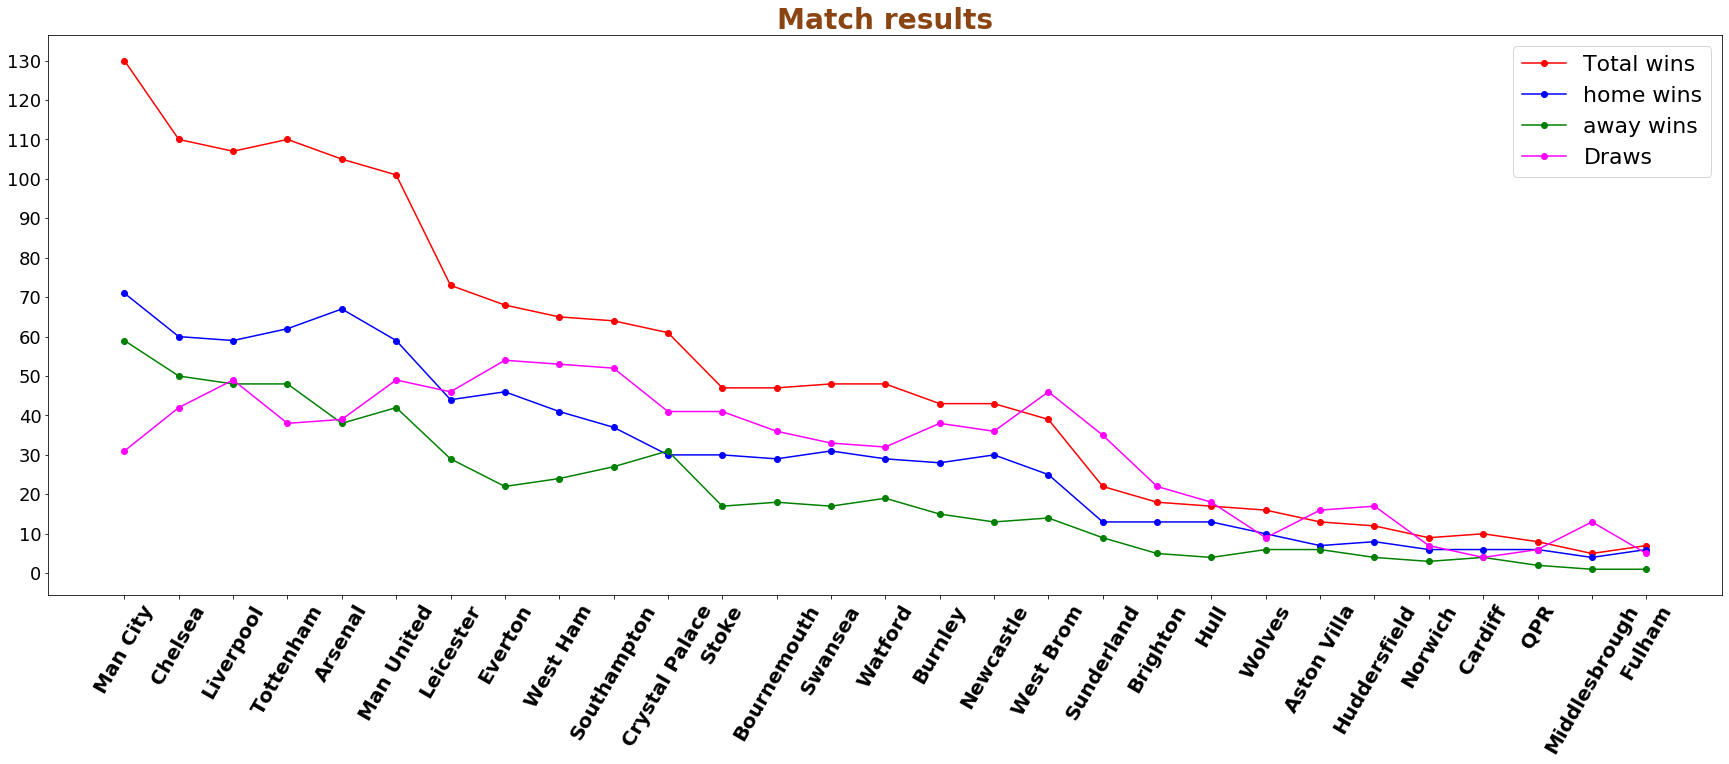

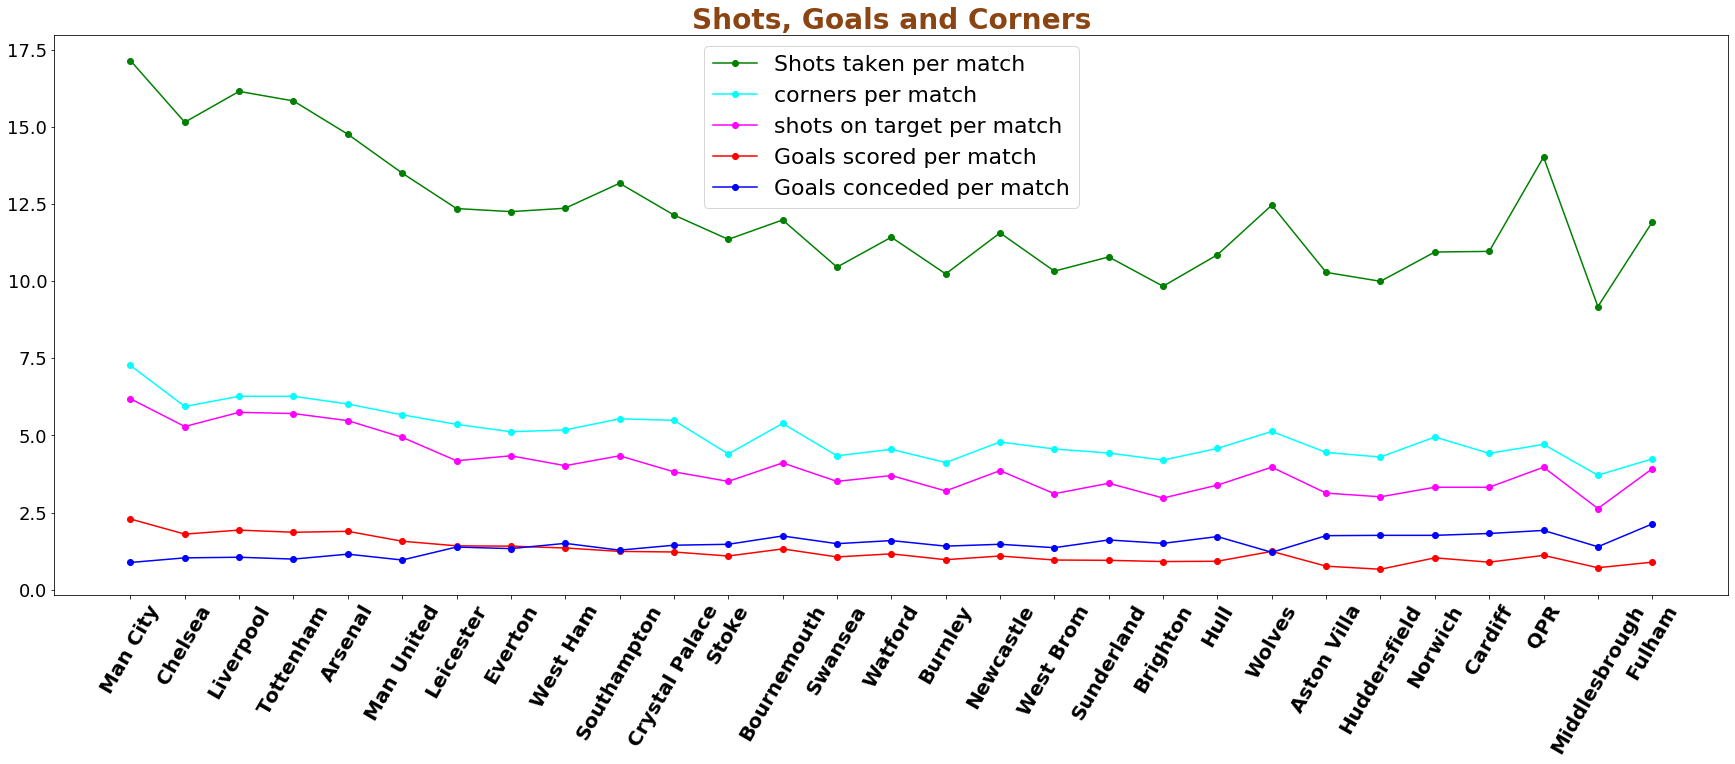

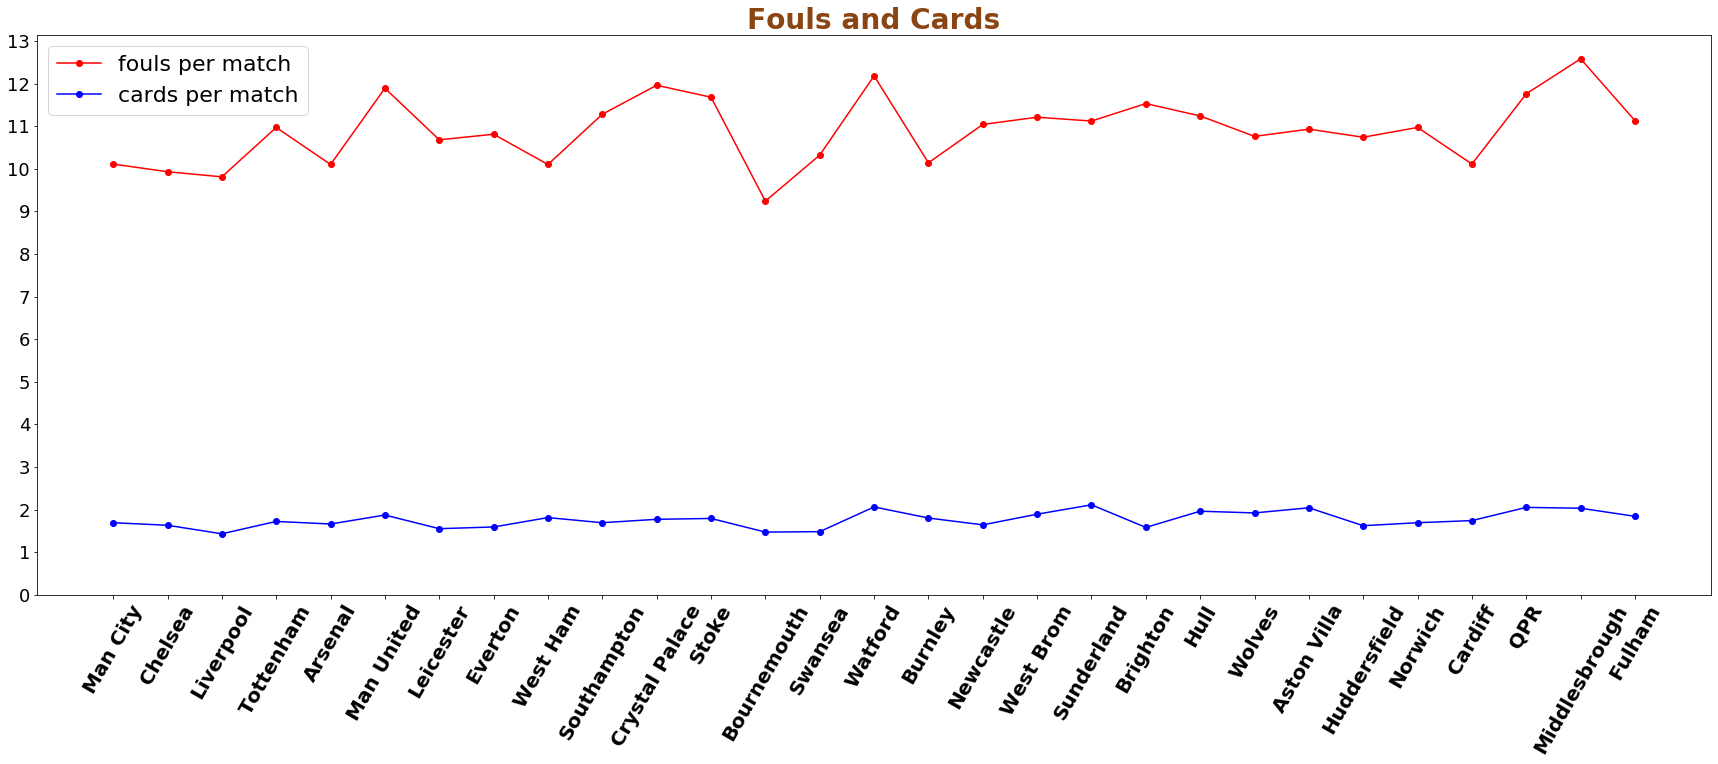

In [11]:
plt.figure(figsize = (30,35))
plt.subplot(311)
plt.plot(points_table_epl.index,points_table_epl['Total_wins'],marker = 'o',color = 'red',label = 'Total wins')
plt.plot(points_table_epl.index,points_table_epl['home_wins'],marker = 'o',color = 'blue',label = 'home wins')
plt.plot(points_table_epl.index,points_table_epl['away_wins'],marker = 'o',color = 'green',label = 'away wins')
plt.plot(points_table_epl.index,points_table_epl['Draws'],marker = 'o',color = 'magenta',label = 'Draws')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,140,10),fontsize = 18)
plt.title('Match results',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(312)
plt.plot(points_table_epl.index,points_table_epl['shot_taken_per_match'],marker = 'o',color = 'green',label = 'Shots taken per match')
plt.plot(points_table_epl.index,points_table_epl['corners_per_match'],marker = 'o',color = 'cyan',label = 'corners per match')
plt.plot(points_table_epl.index,points_table_epl['shot_on_target_per_match'],marker = 'o',color = 'magenta',label = 'shots on target per match')
plt.plot(points_table_epl.index,points_table_epl['goals_scored_per_match'],marker = 'o',color = 'red',label = 'Goals scored per match')
plt.plot(points_table_epl.index,points_table_epl['goals_conceded_per_match'],marker = 'o',color =  'blue',label = 'Goals conceded per match')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 18)
plt.title('Shots, Goals and Corners',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(313)
plt.plot(points_table_epl.index,points_table_epl['fouls_per_match'],marker = 'o',color = 'red',label = 'fouls per match')
plt.plot(points_table_epl.index,points_table_epl['yellow_cards_per_match'] + points_table_epl['red_cards_per_match'],marker = 'o',color = 'blue',label = 'cards per match')
#plt.plot(points_table_epl.index,,marker = 'o',color = 'magenta',label = 'total red cards')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,14,1),fontsize = 18)
plt.title('Fouls and Cards',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.show()

### Big 6 Comparision

- There is a familiar category called big 6 which include top 6 clubs of the league i.e man city, chelsea, liverpool, man united, arsenal and tottenham. So, we are going to visualize the comparisions between these 6 clubs over the last 5 seasons  

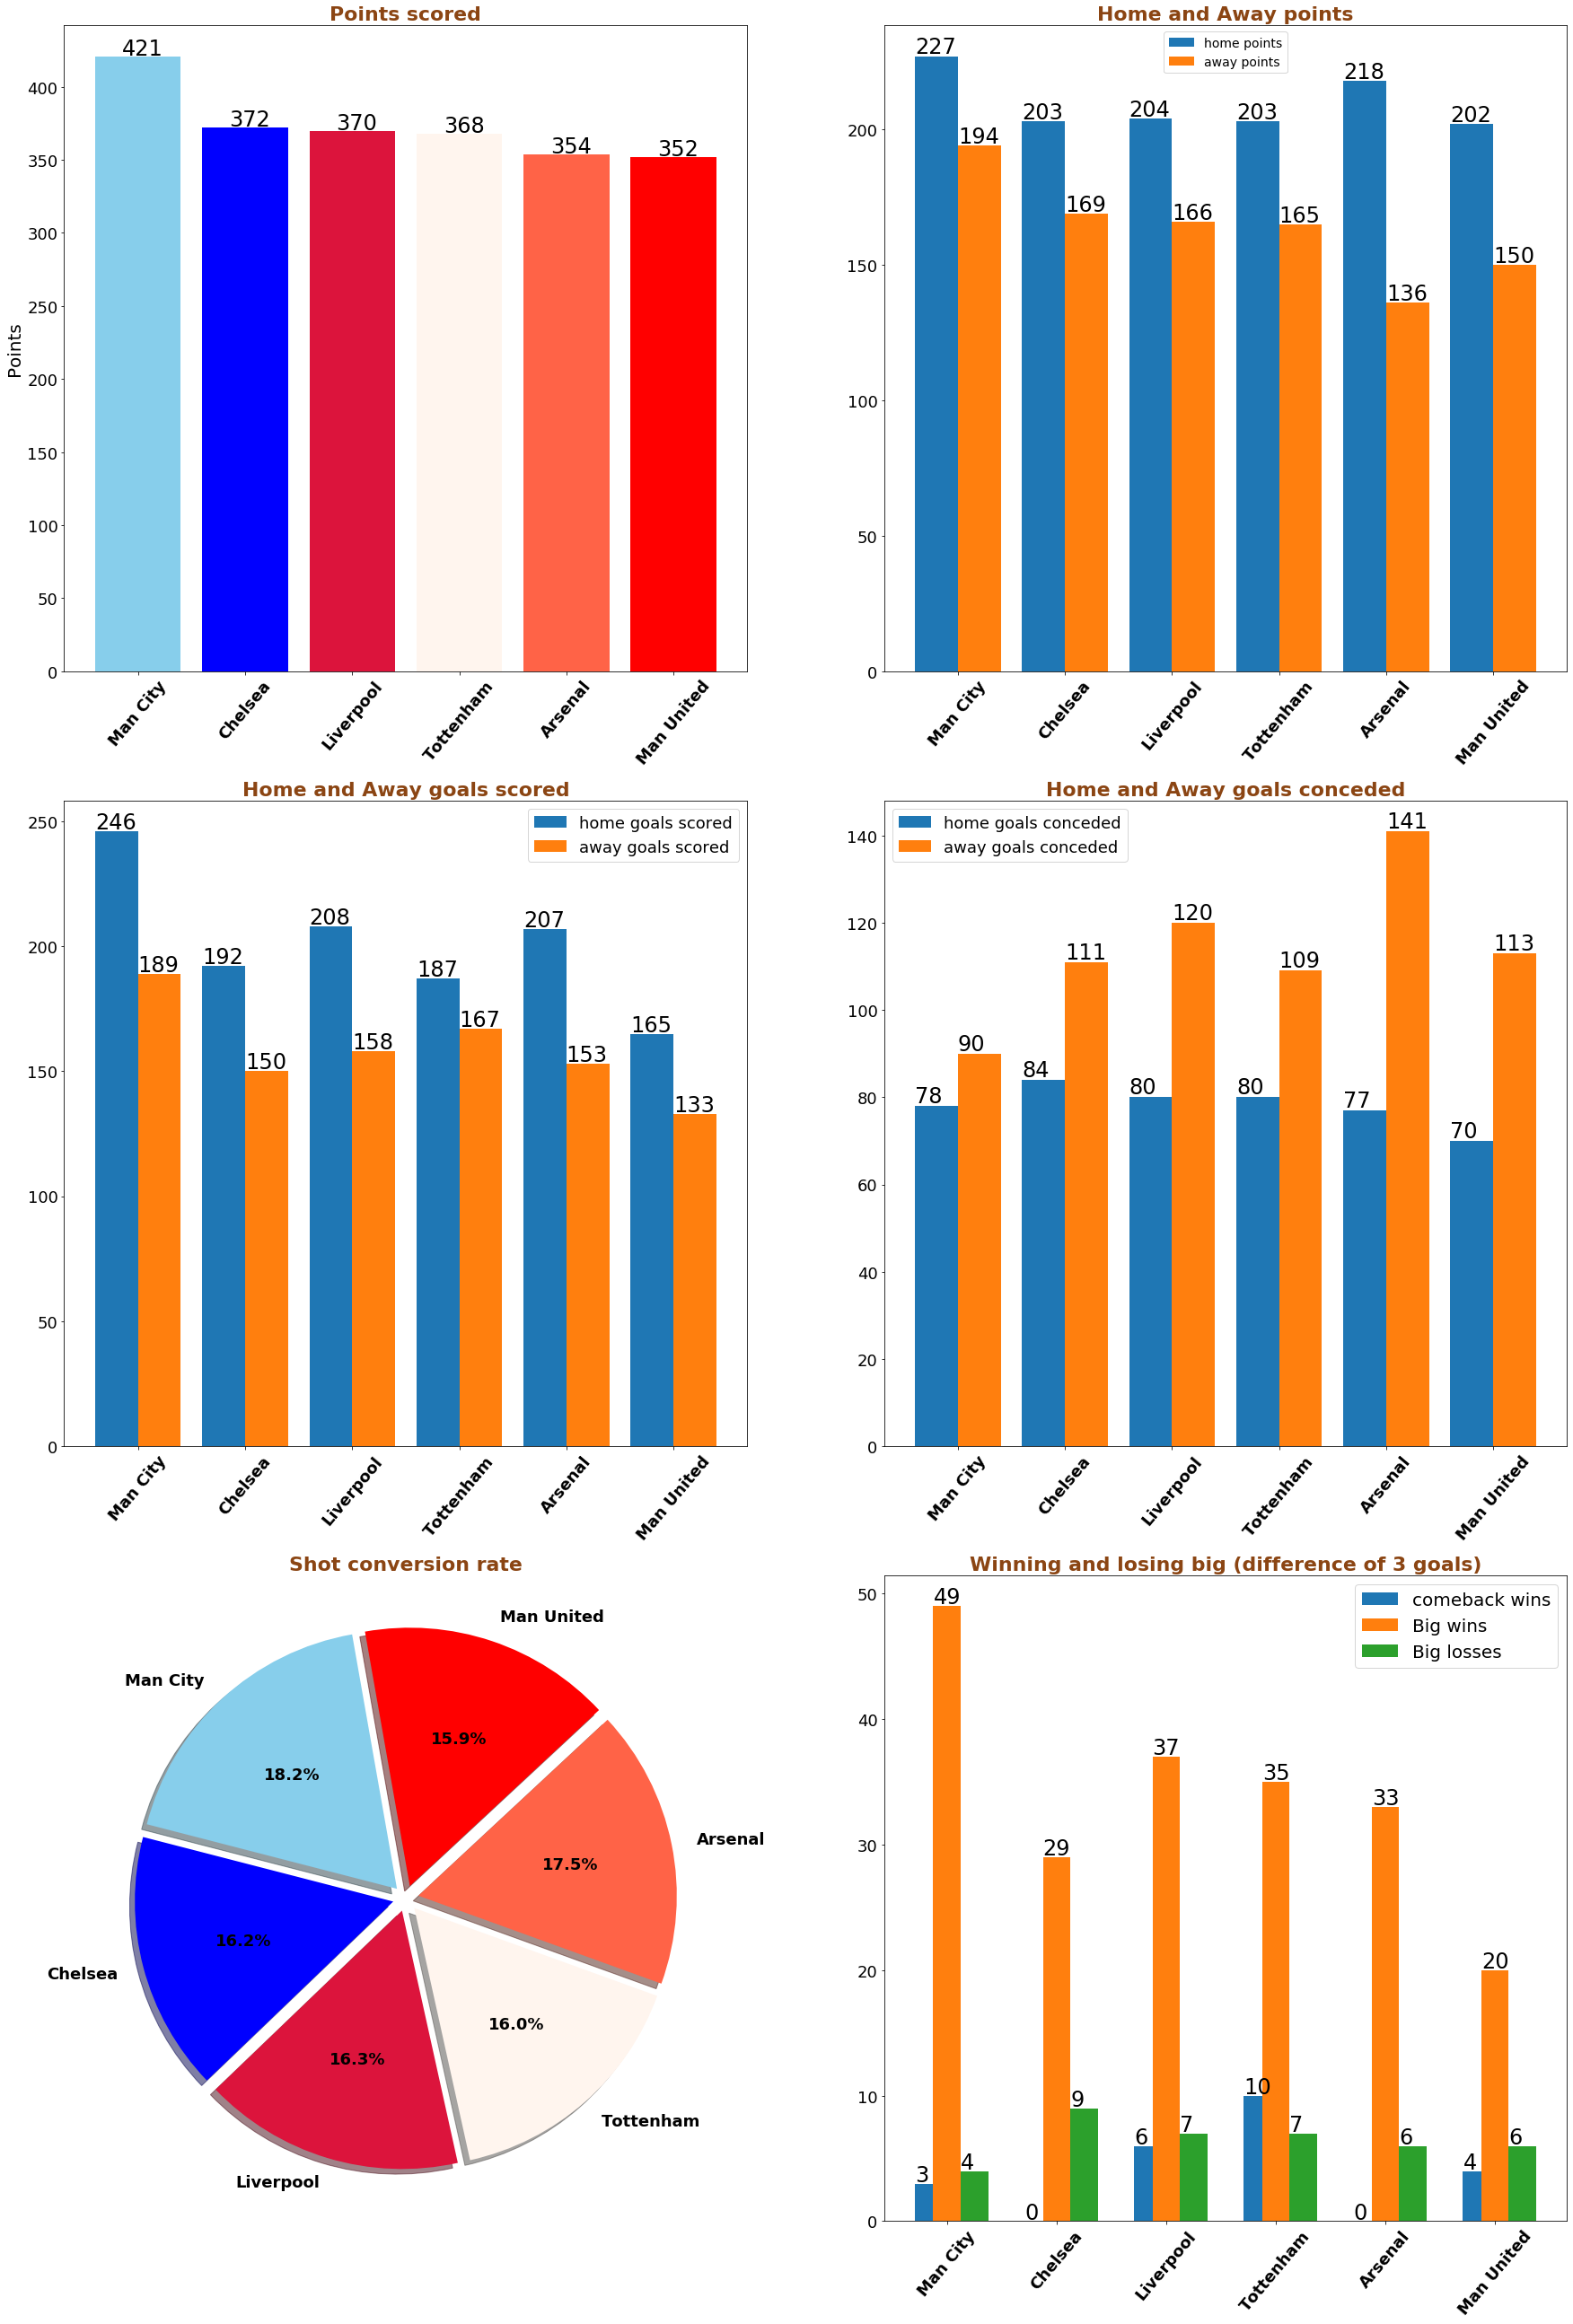

In [12]:
Big_6_epl = points_table_epl[:6]

fig,ax = plt.subplots(3,2,figsize = (30,45))
ax[0,0].bar(Big_6_epl.index,Big_6_epl['Total_points_won'],color = ['skyblue','blue','crimson','seashell','tomato','red'])
ax[0,0].set_ylabel('Points',fontsize = 20)
ax[0,0].set_yticklabels(range(0,500,50),fontsize = 18)
ax[0,0].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,0].set_title('Points scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,0].patches:
    ax[0,0].text(i.get_x()+0.25,i.get_height()+1.2,str(i.get_height()),fontsize = 24)

    
x = np.arange(len(Big_6_epl.index))
w = 0.40
ax[0,1].bar(x - w/2,Big_6_epl['home_points'],w,label = 'home points')
ax[0,1].bar(x + w/2,Big_6_epl['away_points'],w,label = 'away points')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,1].set_yticklabels(range(0,300,50),fontsize = 18)
ax[0,1].legend(loc = 'upper center',fontsize = 14)
ax[0,1].set_title('Home and Away points',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,1].patches:
    ax[0,1].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)


ax[1,0].bar(x-w/2,Big_6_epl['home_goals_scored'],w,label = 'home goals scored')
ax[1,0].bar(x+w/2,Big_6_epl['away_goals_scored'],w,label = 'away goals scored')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,0].set_yticklabels(range(0,300,50),fontsize = 18)
ax[1,0].legend(fontsize = 18)
ax[1,0].set_title('Home and Away goals scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,0].patches:
    ax[1,0].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)

    
ax[1,1].bar(x-w/2,Big_6_epl['home_goals_conceded'],w,label = 'home goals conceded')
ax[1,1].bar(x+w/2,Big_6_epl['away_goals_conceded'],w,label = 'away goals conceded')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,1].set_yticklabels(range(0,180,20),fontsize = 18)
ax[1,1].legend(fontsize = 18)
ax[1,1].set_title('Home and Away goals conceded',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,1].patches:
    ax[1,1].text(i.get_x(),i.get_height()+0.8,str(i.get_height()),fontsize = 24)

ax[2,0].pie(100 * Big_6_epl['goals_scored_per_match']/Big_6_epl['shot_taken_per_match'],autopct = '%1.1f%%',startangle = 100,labels = Big_6_epl.index,shadow = True,explode = (0.05,0.05,0.05,0.05,0.05,0.05),colors = ('skyblue','blue','crimson','seashell','tomato','red'),textprops = {'fontsize':18, 'fontweight':'bold'})
ax[2,0].set_title('Shot conversion rate',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')

w = 0.25
ax[2,1].bar(x-2*w/3,Big_6_epl['comeback_wins'],w,label = 'comeback wins')
ax[2,1].bar(x,Big_6_epl['Big_wins'],w,label = 'Big wins')
ax[2,1].bar(x+w,Big_6_epl['Big_loss'],w,label = 'Big losses')
ax[2,1].set_xticks(x)
ax[2,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[2,1].set_yticklabels(range(0,60,10),fontsize = 18)
ax[2,1].legend(fontsize = 20)
ax[2,1].set_title('Winning and losing big (difference of 3 goals)',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[2,1].patches:
    ax[2,1].text(i.get_x(),i.get_height()+0.2,str(i.get_height()),fontsize = 24)

plt.show()

In [13]:
points_table_epl.columns

Index(['Total games', 'home_wins', 'home_loss', 'away_wins', 'away_loss',
       'Draws', 'home_goals_scored', 'away_goals_scored',
       'home_goals_conceded', 'away_goals_conceded', 'clean sheets',
       'goal_difference', 'goals_scored_per_match', 'goals_conceded_per_match',
       'shot_taken_per_match', 'shot_on_target_per_match', 'fouls_per_match',
       'yellow_cards_per_match', 'red_cards_per_match', 'corners_per_match',
       'Total_wins', 'home_points', 'away_points', 'comeback_wins', 'Big_wins',
       'Big_loss', 'Total_points_won', 'points_per_match', 'team id'],
      dtype='object')

In [14]:
points_table_epl

,Total games,home_wins,home_loss,away_wins,away_loss,Draws,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded,...,corners_per_match,Total_wins,home_points,away_points,comeback_wins,Big_wins,Big_loss,Total_points_won,points_per_match,team id
Team,,,,,,,,,,,,,,,,,,,,,
Man City,190,71,10,59,19,31,246,189,78,90,...,7.27,130,227,194,3,49,4,421,2.22,1
Chelsea,190,60,12,50,26,42,192,150,84,111,...,5.94,110,203,169,0,29,9,372,1.96,2
Liverpool,190,59,9,48,25,49,208,158,80,120,...,6.27,107,204,166,6,37,7,370,1.95,3
Tottenham,190,62,16,48,26,38,187,167,80,109,...,6.27,110,203,165,10,35,7,368,1.94,4
Arsenal,190,67,11,38,35,39,207,153,77,141,...,6.02,105,218,136,0,33,6,354,1.86,5
Man United,190,59,11,42,29,49,165,133,70,113,...,5.67,101,202,150,4,20,6,352,1.85,6
Leicester,190,44,27,29,44,46,143,126,107,155,...,5.36,73,156,109,4,13,12,265,1.39,7
Everton,190,46,25,22,43,54,162,105,110,143,...,5.12,68,162,96,0,20,14,258,1.36,8
West Ham,190,41,29,24,43,53,134,122,128,157,...,5.18,65,148,100,6,11,21,248,1.31,9


In [15]:
df_epl

,Date,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,halftime_away_goals,halftime_results,refree,...,away_shot_ontarget,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red,season
0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,1,D,J Moss,...,2,13,19,9,3,2,2,0,1,1
1,2014-08-16,Leicester,Everton,2,2,D,1,2,A,M Jones,...,3,16,10,3,6,1,1,0,0,1
2,2014-08-16,Man United,Swansea,1,2,A,0,1,A,M Dean,...,4,14,20,4,0,2,4,0,0,1
3,2014-08-16,QPR,Hull,0,1,A,0,0,D,C Pawson,...,4,10,10,8,9,1,2,0,0,1
4,2014-08-16,Stoke,Aston Villa,0,1,A,0,0,D,A Taylor,...,2,14,9,2,8,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2019-05-12,Crystal Palace,Bournemouth,5,3,H,3,1,H,R East,...,8,11,8,4,4,3,0,0,0,5
1896,2019-05-12,Burnley,Arsenal,1,3,A,0,0,D,M Dean,...,6,11,3,4,5,5,1,0,0,5
1897,2019-05-12,Brighton,Man City,1,4,A,1,2,A,M Oliver,...,9,12,8,2,6,0,0,0,0,5
1898,2019-05-12,Fulham,Newcastle,0,4,A,0,2,A,K Friend,...,6,6,8,5,5,1,0,0,0,5


### Creating seperate datafram for learning algorithms

- Now after the analysis and visualization part we have to move to the prediction part, here we have a data of total 5 seasons so we are going to predict the results of 5th season with help of past 4 seasons and also taking the consideration of the current form for each team

In [16]:
ml_epl = df_epl[['Date','hometeam','awayteam','fulltime_results','season']]
ml_epl['hscore'] = df_epl['fulltime_home_goals']
ml_epl['ascore'] = df_epl['fulltime_away_goals']
ml_epl

,Date,hometeam,awayteam,fulltime_results,season,hscore,ascore
0,2014-08-16,Arsenal,Crystal Palace,H,1,2,1
1,2014-08-16,Leicester,Everton,D,1,2,2
2,2014-08-16,Man United,Swansea,A,1,1,2
3,2014-08-16,QPR,Hull,A,1,0,1
4,2014-08-16,Stoke,Aston Villa,A,1,0,1
...,...,...,...,...,...,...,...
1895,2019-05-12,Crystal Palace,Bournemouth,H,5,5,3
1896,2019-05-12,Burnley,Arsenal,A,5,1,3
1897,2019-05-12,Brighton,Man City,A,5,1,4
1898,2019-05-12,Fulham,Newcastle,A,5,0,4


### Assigning required data to the matches which will usefull for the learning algos

- As we have team names in string we are going to give each team a id based on their performance of last seasons, so that take the past influence of the teams. We are also going to create a 2 columns which will tell how the teams perform in their home and away matches

In [17]:
ids = {}
a = 0 
for i in points_table_epl.index:
    ids[i] = a+1
    a += 1
pts_per_home_match = {}
a=0
for i in points_table_epl['team id']:
    pts_per_home_match[i] = (2*points_table_epl['home_points'][a] / (points_table_epl['Total games'][a]))
    a += 1

pts_per_away_match = {}
a=0
for i in points_table_epl['team id']:
    pts_per_away_match[i] = (2*points_table_epl['away_points'][a] / (points_table_epl['Total games'][a]))
    a += 1
pts_per_away_match

{1: 2.042105263157895,
 2: 1.7789473684210526,
 3: 1.7473684210526317,
 4: 1.736842105263158,
 5: 1.431578947368421,
 6: 1.5789473684210527,
 7: 1.1473684210526316,
 8: 1.0105263157894737,
 9: 1.0526315789473684,
 10: 1.105263157894737,
 11: 1.2210526315789474,
 12: 0.9736842105263158,
 13: 0.9342105263157895,
 14: 0.881578947368421,
 15: 0.9210526315789473,
 16: 0.868421052631579,
 17: 0.7631578947368421,
 18: 0.8947368421052632,
 19: 0.7543859649122807,
 20: 0.631578947368421,
 21: 0.5526315789473685,
 22: 1.2105263157894737,
 23: 0.6052631578947368,
 24: 0.5526315789473685,
 25: 0.5789473684210527,
 26: 0.7368421052631579,
 27: 0.3684210526315789,
 28: 0.5263157894736842,
 29: 0.2631578947368421}

In [18]:
ml_epl = ml_epl.replace({'hometeam' : ids})
ml_epl = ml_epl.replace({'awayteam' : ids})
ml_epl.rename(columns = {'hometeam':'hometeam_id','awayteam':'awayteam_id'},inplace = True)
ml_epl['HTeam_pt_per_home_match'] = ml_epl['hometeam_id']

In [19]:
ml_epl = ml_epl.replace({'HTeam_pt_per_home_match' : pts_per_home_match})

In [20]:
ml_epl['ATeam_pt_per_away_match'] = ml_epl['awayteam_id']
ml_epl = ml_epl.replace({'ATeam_pt_per_away_match' : pts_per_away_match})

In [21]:
ml_epl.tail(40)

,Date,hometeam_id,awayteam_id,fulltime_results,season,hscore,ascore,HTeam_pt_per_home_match,ATeam_pt_per_away_match
1860,2019-04-20,13,29,A,5,0,1,1.394737,0.263158
1861,2019-04-20,1,4,H,5,1,0,2.389474,1.736842
1862,2019-04-21,5,11,A,5,2,3,2.294737,1.221053
1863,2019-04-21,26,3,A,5,0,2,1.052632,1.747368
1864,2019-04-21,8,6,H,5,4,0,1.705263,1.578947
1865,2019-04-22,2,16,D,5,2,2,2.136842,0.868421
1866,2019-04-23,4,20,H,5,1,0,2.136842,0.631579
1867,2019-04-23,15,10,D,5,1,1,1.394737,1.105263
1868,2019-04-24,6,1,A,5,0,2,2.126316,2.042105
1869,2019-04-24,22,5,H,5,3,1,1.789474,1.431579




- As we know in football the recent form matters way more than their reputations, so we are going to include a number of columns which will show their recent form.
- This include their previous head to head results, their previous 5 matches results, their scoring form and also their conceding form which will us about both their defence and attacking abilities, as we know keeping clean sheets is a very important factor in winning matches so we will get the number of clean sheets in their recent matches 



In [22]:
def previous_5_matches(ml_epl,date,team_id):
    matches = ml_epl[(ml_epl['hometeam_id'] == team_id) | (ml_epl['awayteam_id'] == team_id)]
    last_matches = matches[matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[:5,:]
    x = 0
    for i in range(5):
        if len(last_matches) <= i:
            break
        if ((last_matches['hometeam_id'].iloc[i] == team_id) and (last_matches['fulltime_results'].iloc[i] == 'H')):
            x += 3
        elif ((last_matches['awayteam_id'].iloc[i] == team_id) and (last_matches['fulltime_results'].iloc[i] == 'A')):
            x+=3
        elif (last_matches['fulltime_results'].iloc[i] == 'D'):
            x += 1
    return x

In [23]:
def htoh_results(ml_epl,date,h_team,a_team):
    matches = ml_epl[((ml_epl['hometeam_id'] == h_team) | (ml_epl['awayteam_id'] == h_team)) & ((ml_epl['hometeam_id'] == a_team) | (ml_epl['awayteam_id'] == a_team))]
    last_matches = matches[matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[:,:]
    s = 0
    r = 0
    for i in range(3):
        if len(last_matches) <= i:
            break
        if ((last_matches['hometeam_id'].iloc[i] == h_team) and (last_matches['fulltime_results'].iloc[i] == 'H')):
            s += 3
        elif ((last_matches['awayteam_id'].iloc[i] == h_team) and (last_matches['fulltime_results'].iloc[i] == 'A')):
            s += 3
        elif (last_matches['fulltime_results'].iloc[i] == 'D'):
            s += 1 
            r += 1
        else :
            r += 3
    return s,r

In [24]:
def recent_scoring_form(ml_epl,date,h_team):
    matches = ml_epl[((ml_epl['hometeam_id'] == h_team) | (ml_epl['awayteam_id'] == h_team))]
    last_matches = matches[matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[:5,:]
    s = 0
    r = 0
    for i in range(5):
        if len(last_matches) <= i:
            break
        if last_matches['hometeam_id'].iloc[i] == h_team:
            s += last_matches['hscore'].iloc[i]
            r += last_matches['ascore'].iloc[i]
        if last_matches['awayteam_id'].iloc[i] == h_team:
            s += last_matches['ascore'].iloc[i]
            r += last_matches['hscore'].iloc[i]
    return s,r

In [25]:
def recent_cs(ml_epl,date,h_team):
    matches = ml_epl[((ml_epl['hometeam_id'] == h_team) | (ml_epl['awayteam_id'] == h_team))]
    last_matches = matches[matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[:5,:]
    s = 0
    for i in range(5):
        if len(last_matches) <= i:
            break
        if last_matches['hometeam_id'].iloc[i] == h_team and last_matches['ascore'].iloc[i] == 0:
            s += 1
        if last_matches['awayteam_id'].iloc[i] == h_team and last_matches['hscore'].iloc[i] == 0:
            s += 1
    return s

In [26]:
h = []
a = []
h_t = []
a_t = []
h_prev_for = []
h_prev_against = []
a_prev_for = []
a_prev_against = []
h_cs = []
a_cs = []
for i in range(1900):
    x = previous_5_matches(ml_epl,ml_epl['Date'][i],ml_epl['hometeam_id'][i])
    y = previous_5_matches(ml_epl,ml_epl['Date'][i],ml_epl['awayteam_id'][i])
    s,r = htoh_results(ml_epl,ml_epl['Date'][i],ml_epl['hometeam_id'][i],ml_epl['awayteam_id'][i])
    x1,y1 =  recent_scoring_form(ml_epl,ml_epl['Date'][i],ml_epl['hometeam_id'][i])
    s1,r1 =  recent_scoring_form(ml_epl,ml_epl['Date'][i],ml_epl['awayteam_id'][i])
    cs1 = recent_cs(ml_epl,ml_epl['Date'][i],ml_epl['hometeam_id'][i])
    cs2 = recent_cs(ml_epl,ml_epl['Date'][i],ml_epl['awayteam_id'][i])
    h.append(x)
    a.append(y)
    h_t.append(s)
    a_t.append(r)
    h_prev_for.append(x1)
    h_prev_against.append(y1)
    a_prev_for.append(s1)
    a_prev_against.append(r1)
    h_cs.append(cs1)
    a_cs.append(cs2)

In [27]:
ml_epl['home_team_form'] = h
ml_epl['away_team_form'] = a
ml_epl['hometeam_headtohead'] = h_t
ml_epl['awayteam_headtohead'] = a_t
ml_epl['hometeam_recent_scoring_form'] = h_prev_for
ml_epl['hometeam_recent_conceding_form'] = h_prev_against
ml_epl['awayteam_recent_scoring_form'] = a_prev_for
ml_epl['awayteam_recent_conceding_form'] = a_prev_against
ml_epl['hometeam_recent_cs'] = h_cs
ml_epl['awayteam_recent_cs'] = a_cs
ml_epl

,Date,hometeam_id,awayteam_id,fulltime_results,season,hscore,ascore,HTeam_pt_per_home_match,ATeam_pt_per_away_match,home_team_form,away_team_form,hometeam_headtohead,awayteam_headtohead,hometeam_recent_scoring_form,hometeam_recent_conceding_form,awayteam_recent_scoring_form,awayteam_recent_conceding_form,hometeam_recent_cs,awayteam_recent_cs
0,2014-08-16,5,11,H,1,2,1,2.294737,1.221053,0,0,0,0,0,0,0,0,0,0
1,2014-08-16,7,8,D,1,2,2,1.642105,1.010526,0,0,0,0,0,0,0,0,0,0
2,2014-08-16,6,14,A,1,1,2,2.126316,0.881579,0,0,0,0,0,0,0,0,0,0
3,2014-08-16,27,21,A,1,0,1,1.210526,0.552632,0,0,0,0,0,0,0,0,0,0
4,2014-08-16,12,23,A,1,0,1,1.421053,0.605263,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2019-05-12,11,13,H,5,5,3,1.136842,0.934211,10,7,2,5,8,7,10,7,2,2
1896,2019-05-12,16,5,A,5,1,3,1.328947,1.431579,7,4,0,9,7,6,5,10,1,1
1897,2019-05-12,20,1,A,5,1,4,1.368421,2.042105,3,15,0,9,2,5,8,1,1,4
1898,2019-05-12,29,17,A,5,0,4,1.105263,0.763158,9,7,1,1,5,5,7,6,3,1


### Checking the correlation between the features

- We are going to check if the features are too much correlated or not, as features with too much correlation will not help the model that much but will increases the time taken

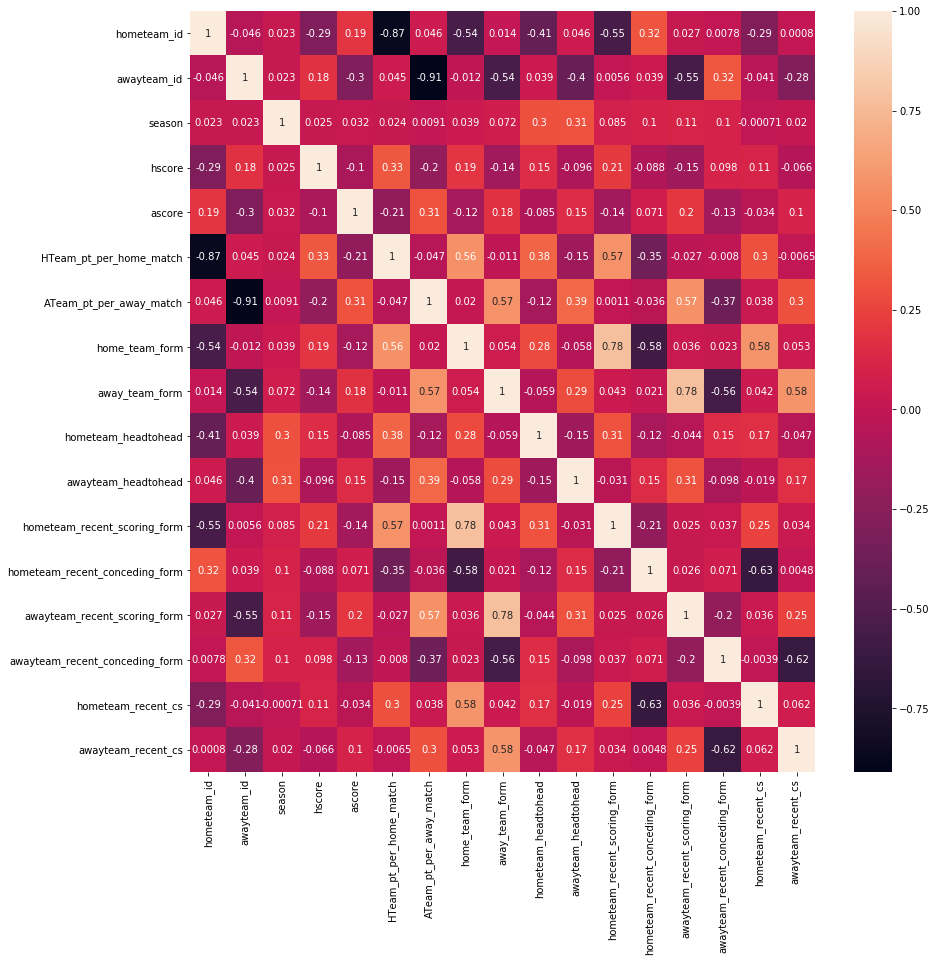

In [28]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(ml_epl.corr(),annot = True)
plt.show()

### Applying different models to the data and checking the confusion matrix

- We are going to run different models with different parameters available and check which model gives the best accuracy. We are also going to check the confusion matrix which will tell which results are tuff to predict

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:1520]
y = ml_epl['fulltime_results'][:1520]
clf1 = LogisticRegression(random_state = 0,C= 0.9,solver = 'saga',multi_class = 'multinomial',class_weight = {'H': 0.9,'D' : 1,'A' : 1.1})
clf1.fit(X,y)
X_test = ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:]
y_test = ml_epl['fulltime_results'][1520:]
print('accuracy of simple logistic regression model is: ',clf1.score(X_test,y_test)*100,'%')

accuracy of simple logistic regression model is:  62.10526315789474 %


In [30]:
clf1.predict_proba(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:1520])

array([[0.17315575, 0.34335103, 0.48349323],
       [0.27513263, 0.3559311 , 0.36893627],
       [0.1362892 , 0.34354042, 0.52017038],
       ...,
       [0.30213829, 0.25670282, 0.44115889],
       [0.33628763, 0.26817675, 0.39553561],
       [0.13173183, 0.23121564, 0.63705253]])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ml_epl['fulltime_results'][:],clf1.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))

array([[372,  15, 189],
       [164,  16, 274],
       [171,  15, 684]], dtype=int64)

In [32]:
from sklearn import model_selection
from sklearn.metrics import classification_report
predicted1 = clf1.predict(X_test)
report1 = classification_report(y_test,predicted1)
print(report1)

              precision    recall  f1-score   support

           A       0.62      0.71      0.66       128
           D       0.20      0.03      0.05        71
           H       0.64      0.79      0.71       181

    accuracy                           0.62       380
   macro avg       0.49      0.51      0.47       380
weighted avg       0.55      0.62      0.57       380



In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
clf2 = SVC(kernel = 'linear',C = 0.9,decision_function_shape = 'ovr',break_ties = True,random_state = 0,class_weight = {'H': 0.9,'D' : 1,'A' : 1.1})
clf2.fit(X,y)
print('accuracy of SVC model is: ',clf2.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:],ml_epl['fulltime_results'][1520:])*100,'%')

accuracy of SVC model is:  62.36842105263158 %


In [34]:
confusion_matrix(ml_epl['fulltime_results'][:],clf2.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))

array([[371,   8, 197],
       [171,   9, 274],
       [165,  10, 695]], dtype=int64)

In [35]:
predicted2 = clf2.predict(X_test)
report2 = classification_report(y_test,predicted2)
print(report2)

              precision    recall  f1-score   support

           A       0.65      0.66      0.65       128
           D       0.12      0.01      0.03        71
           H       0.63      0.84      0.72       181

    accuracy                           0.62       380
   macro avg       0.47      0.50      0.47       380
weighted avg       0.54      0.62      0.57       380



In [36]:
from sklearn import neighbors 
clf3 = neighbors.KNeighborsClassifier(95)
clf3.fit(X,y)
clf3.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:],ml_epl['fulltime_results'][1520:])*100

59.210526315789465

In [37]:
confusion_matrix(ml_epl['fulltime_results'][:],clf3.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))

array([[325,   4, 247],
       [130,   6, 318],
       [146,   2, 722]], dtype=int64)

In [38]:
from sklearn import tree
clf4 = tree.DecisionTreeClassifier(max_depth =2)
clf4.fit(X,y)
clf4.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:],ml_epl['fulltime_results'][1520:])*100

57.89473684210527

In [39]:
confusion_matrix(ml_epl['fulltime_results'][:],clf4.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))

array([[254,   0, 322],
       [ 78,   0, 376],
       [ 88,   0, 782]], dtype=int64)

In [40]:
from sklearn.neural_network import MLPClassifier
clf5 = MLPClassifier(hidden_layer_sizes = (1000,),activation = 'identity',solver = 'lbfgs',random_state = 1)
clf5.fit(X,y)
print(clf5.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:],ml_epl['fulltime_results'][:])*100)

55.736842105263165


In [41]:
confusion_matrix(ml_epl['fulltime_results'][:],clf5.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))

array([[332,  23, 221],
       [134,  15, 305],
       [132,  26, 712]], dtype=int64)

In [42]:
clf6 = MLPClassifier(hidden_layer_sizes = (6000,),activation = 'identity',solver = 'adam',random_state = 1,learning_rate_init = 0.001)
clf6.fit(X,y)
print(clf6.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:],ml_epl['fulltime_results'][1520:])*100)

60.0


In [43]:
confusion_matrix(ml_epl['fulltime_results'][:],clf6.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))

array([[278,   1, 297],
       [ 93,   2, 359],
       [ 96,   0, 774]], dtype=int64)

In [44]:
predicted3 = clf6.predict(X_test)
report3 = classification_report(y_test,predicted3)
print(report3)

              precision    recall  f1-score   support

           A       0.67      0.51      0.58       128
           D       1.00      0.03      0.05        71
           H       0.57      0.89      0.70       181

    accuracy                           0.60       380
   macro avg       0.75      0.48      0.44       380
weighted avg       0.69      0.60      0.54       380



# Conclusion :
We can see after running all the models that logistic regression give the best results of 62.105% accuracy, which is a quite descent result for football prection models, but we have faced problems in predicting the draws which constitute of mor than 23% of the results.We have tried to tackle this problem by changing the class weights but as home wins and away wins have more percentage of results, the total accuracy decreases. We can get a result of 62.8% in SVC model but the problem there is it does not predict a single draw which is not that good. Even adam solver of MLPClassifier gives good results but I am not able to make it predict the draws. Overall we have 3 good models logistic regression, SVC and MLPClassifier with solver adam  which gives 60% or more which is quite good for football prediction in league matches, but the logistic regression model gives the best generalized results.  